<a href="https://colab.research.google.com/github/PawelSmolinski/MachineLearning/blob/main/Assigment_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl

In [ ]:
# Fetching the Boston Housing dataset from a GitHub repository
!wget https://github.com/PawelSmolinski/MachineLearning/raw/main/Datasets/Boston.csv


In [26]:
# Reading the dataset into a pandas DataFrame
boston_df = pd.read_csv('Boston.csv').drop('Unnamed: 0', axis=1)

In [27]:
# Display the first few rows of the DataFrame
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
# Generating descriptive statistics of the DataFrame
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


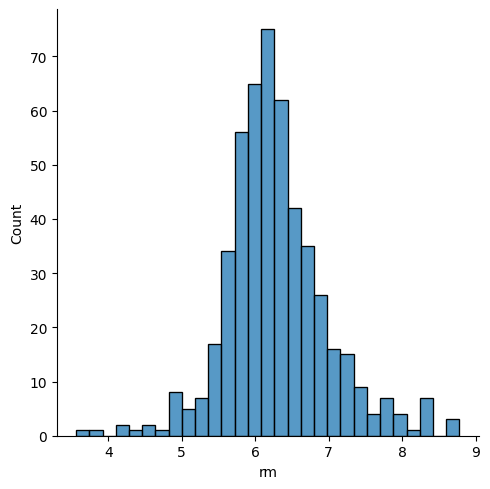

In [30]:
# Histogram for a specific feature (example: 'RM' - average number of rooms - it can be any other variable of intrest)
sns.displot(boston_df['rm'])

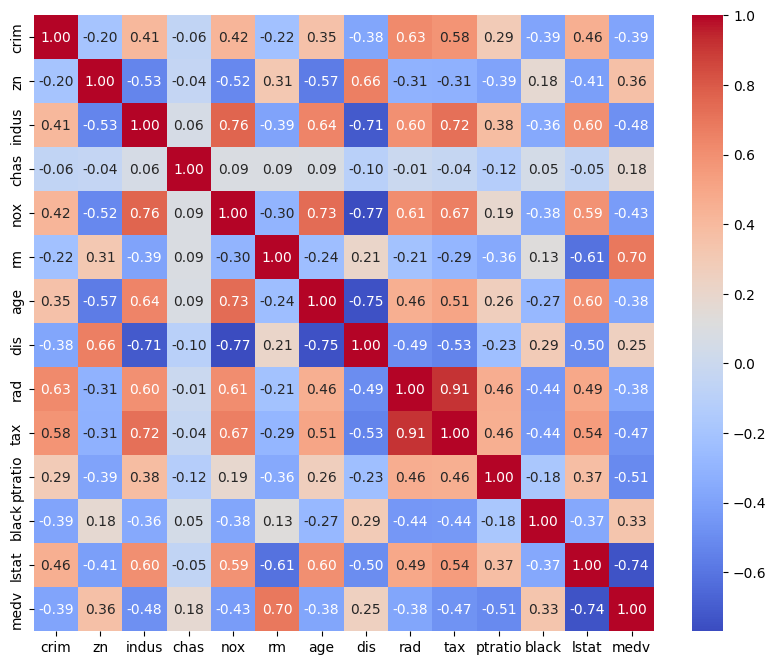

In [31]:
# Calculating the correlation matrix
corr = boston_df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjusting the size of the figure
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [32]:
# Splitting the dataset into features and target variable
X = boston_df.drop('medv', axis=1)  # Features
y = boston_df['medv']               # Target variable

In [33]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=420)

In [34]:
# Training a linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
# Printing the intercept of the model
print(lm.intercept_)

# Creating and displaying a DataFrame of coefficients
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

# This step is not necessery, it's just to display the coefficients from Linear Regression

34.41890996359545
         Coefficient
crim       -0.087814
zn          0.039078
indus      -0.065321
chas        3.795035
nox       -14.791365
rm          3.536040
age         0.001573
dis        -1.324683
rad         0.341012
tax        -0.011357
ptratio    -0.935847
black       0.013184
lstat      -0.519436


In [36]:
# Making predictions on the test set
predictions = lm.predict(X_test)

In [37]:
# Evaluating the model performance
from sklearn import metrics
from sklearn.metrics import r2_score
print("Linear Regression:")
print("R^2 Score:", r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Linear Regression:
R^2 Score: 0.740019393544042
MAE: 3.4689515780165503
MSE: 22.27909160067225
RMSE: 4.720073262214502


In [38]:
# Training a Lasso regression model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_test)

In [39]:
# Evaluating the Lasso model
lasso_mae = metrics.mean_absolute_error(y_test, lasso_predictions)
lasso_mse = metrics.mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = metrics.r2_score(y_test, lasso_predictions)
print("Lasso Regression:")
print("R^2:", lasso_r2)
print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)


Lasso Regression:
R^2: 0.7277314659490961
MAE: 3.580027258194022
MSE: 23.33210808602537
RMSE: 4.830332088586185


In [40]:
# Displaying coefficients from the Lasso model
lasso_coeff_df = pd.DataFrame(lasso_reg.coef_, index=X.columns, columns=['Coefficient'])
print(lasso_coeff_df)

         Coefficient
crim       -0.074932
zn          0.041460
indus      -0.111460
chas        2.227455
nox        -0.000000
rm          3.422265
age        -0.006373
dis        -1.057894
rad         0.329025
tax        -0.014128
ptratio    -0.783630
black       0.013532
lstat      -0.561970


In [43]:
# A custom function to predict the price of a new house
def predict_house_price(model, new_data):
    """
    Predicts the price of a house given its features.

    :param model: The trained regression model
    :param new_data: A dictionary containing the features of the house
    :return: Predicted price of the house
    """
    # Convert the new data into a DataFrame
    new_df = pd.DataFrame(new_data, index=[0])

    # Make a prediction using the model
    price_pred = model.predict(new_df)

    return price_pred[0]

# Define the features of the new house matching the dataset's column names
new_house_features = {
    'crim': 0.1,    # Per capita crime rate by town
    'zn': 18.0,     # Proportion of residential land zoned for lots over 25,000 sq.ft.
    'indus': 7.0,   # Proportion of non-retail business acres per town
    'chas': 0,      # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    'nox': 0.45,    # Nitric oxides concentration (parts per 10 million)
    'rm': 6,        # Average number of rooms per dwelling
    'age': 68.2,    # Proportion of owner-occupied units built prior to 1940
    'dis': 3.4,     # Weighted distances to five Boston employment centres
    'rad': 4,       # Index of accessibility to radial highways
    'tax': 307.0,   # Full-value property-tax rate per $10,000
    'ptratio': 21.0,# Pupil-teacher ratio by town
    'black': 396.90,# 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'lstat': 12.5   # % lower status of the population
}

# Predicting the price of the new house
predicted_price = predict_house_price(lm, new_house_features)

# Multiplying the predicted price by 1000 to convert it into dollars
predicted_price_in_dollars = predicted_price * 1000

# Printing the predicted price in dollars
print(f"Predicted Price of the New House: ${predicted_price_in_dollars:,.2f}")

# Note: This is a simple example. In real-world scenarios, the prediction might need further adjustment
# considering market trends, additional features, and data normalization.


Predicted Price of the New House: $21,784.07
